<a href="https://colab.research.google.com/github/ouldsidy/Projets/blob/main/ProjetML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet d'apprentisage automatique
**Abdoul Ahad AHMEDOU (EMSBD-promotion 5)**











Dans ce projet, nous allons construire un modèle prédictif à partir d'un ensemble de données réalistes. Les données étudiées sont stockées dans plusieurs fichiers. Ils concernent 100 000 français. L'objectif est de construire un modèle prédictif pour la variable "target", qui ici représente une caractéristique non dévaluée liée au statut socio-économique de la personne pris au sens large.


Dans ce projet, je vais d’abord travailler sur l’ensemble de base sur les personnes, par la suite, je compléterai cet ensemble de données par des informations complémentaires sur ces personnes (métiers, sports, etc), on formera de nouveaux ensembles de données, pour chaque ensemble, voici les étapes principales que nous allons parcourir :
-	Récupérer les données.
-	Découvrir et visualiser les données pour mieux les comprendre.
-	Préparer les données pour l’algorithme d’apprentissage automatique.
-	Plusieurs modèles vont être utilisés pour l’entrainement.
-	Le modèle sélectionné sera réglé avec précision et par la suite, il sera utilisé pour la prédiction sur notre ensemble test.









### Pckages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Partie I : Utilisation de données sur les personnes

Dans cette première partie, on va travailler uniquement sur les données de base, c'est-à-dire la description générale des personnes.



### Examiner la structure des donneés

Examinons les cinq premières lignes de l'ensemble de données sur la déscription générale des personnes à l'aide de la méthode head() du DataFrame.

In [ ]:
#Importation des données
df_pers = pd.read_csv("/content/drive/MyDrive/projet MLfiles/learn_dataset.csv")
df_pers.head()



,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target
0,1,type1-1,44,Male,csp_4_5,False,DIP|1|3,ft4-1,01004,33.179
1,3,type2-1,52,Male,csp_7_7,False,DIP|1|1,ft4-3,01004,42.306
2,5,type2-1,80,Male,csp_7_4,False,DIP|1|7,ft4-4,01004,45.922
3,7,type1-1,58,Male,csp_2_2,False,DIP|1|6,ft1-1,01004,39.303
4,11,type1-1,42,Male,csp_6_7,False,DIP|1|3,ft1-1,01004,28.623


In [ ]:
df_01=df_pers.copy()

In [ ]:
df_01.drop(columns=["UID"],axis=1,inplace=True)
df_01['Is_student'] = df_01['Is_student'].astype(str)

In [ ]:
def check_df(dataframe, head=5):
    print("##########################################  SHAPE ##########################################")
    print(dataframe.shape)
    print("##########################################  Types ##########################################")
    print(dataframe.dtypes)
    print("######################################### NA ##########################################")
    print(dataframe.isnull().sum())
    print("##########################################  NUMBERUNIQE ########################################## ")
    print(dataframe.nunique())
    print("########################################## Quantiles ########################################## ")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [ ]:
check_df(df_01)

##########################################  SHAPE ##########################################
(50000, 9)
##########################################  Types ##########################################
ACTIVITY_TYPE      object
AGE_2018            int64
sex                object
OCCUPATION_42      object
Is_student         object
degree             object
household_type     object
Insee              object
target            float64
dtype: object
######################################### NA ##########################################
ACTIVITY_TYPE     0
AGE_2018          0
sex               0
OCCUPATION_42     0
Is_student        0
degree            0
household_type    0
Insee             0
target            0
dtype: int64
##########################################  NUMBERUNIQE ########################################## 
ACTIVITY_TYPE         6
AGE_2018             94
sex                   2
OCCUPATION_42        41
Is_student            2
degree               12
household_type        9
Insee 

On a dans cet ensemble de données de 50 000 personnes et 10 variables, sans valeurs manquantes. Deux variables sont numériques : AGE_2018 et traget.
On remarque l'existence d'une variable catégorielle, "OCCUPATION_42" avec 42 modalités différentes. Il serait intéressant de créer une fonction pour séparer cet ensemble en colonnes numériques et catégorielles (moins de 20 modalités et plus de 20 modalités)



In [ ]:
def grab_col_names(dataframe, cat_th=9, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_01)

Observations: 50000
Variables: 9
cat_cols: 5
num_cols: 2
cat_but_car: 2
num_but_cat: 0


On va par exemple afficher les colonnes de type catégoriques avec plus de 20 modalités différenets.

In [ ]:
df_01[cat_but_car].head()

,OCCUPATION_42,Insee
0,csp_4_5,01004
1,csp_7_7,01004
2,csp_7_4,01004
3,csp_2_2,01004
4,csp_6_7,01004


Dans un premier temps, on se passera de ces deux variables, nous allons évaluer rapidement un premier modèle sans ces variables.

### Distribution de variables catégorielles

On visualise ici, les variables catégorielles ayant moins de 20 modalités et le ratio de chacune d’entre elles.

In [ ]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

         ACTIVITY_TYPE   Ratio
type1-1          24360  48.720
type2-1          13475  26.950
type2-2           4765   9.530
type1-2           3786   7.572
type2-5           2154   4.308
type2-4           1460   2.920
##########################################


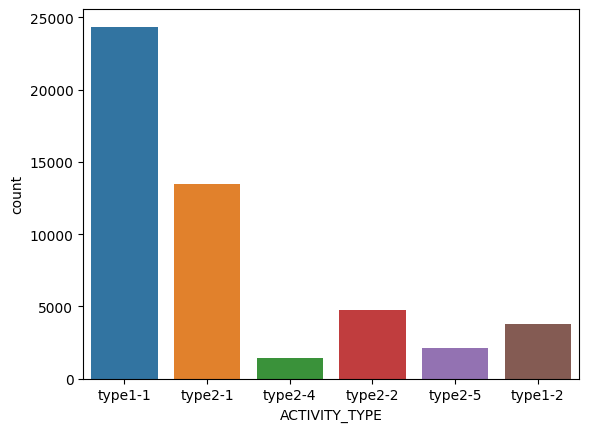

          sex  Ratio
Female  26150   52.3
Male    23850   47.7
##########################################


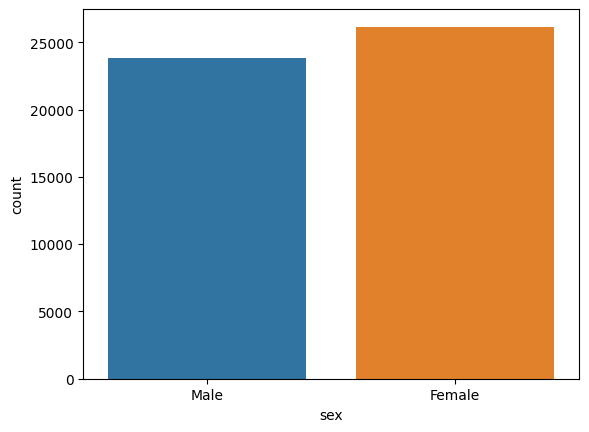

       Is_student   Ratio
False       43893  87.786
True         6107  12.214
##########################################


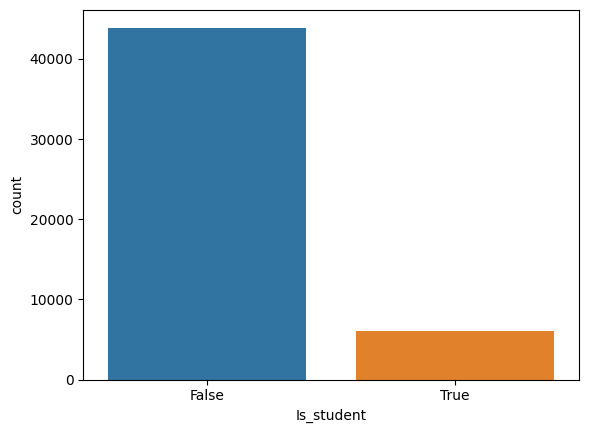

         degree   Ratio
DIP|1|3   11263  22.526
DIP|1|4    5431  10.862
DIP|1|6    5153  10.306
DIP|1|8    4493   8.986
DIP|1|7    4393   8.786
DIP|1|2    4320   8.640
DIP|1|5    3616   7.232
DIP|1|1    3515   7.030
DIP|3      3507   7.014
DIP|2      2708   5.416
DIP|1      1177   2.354
DIP|1|9     424   0.848
##########################################


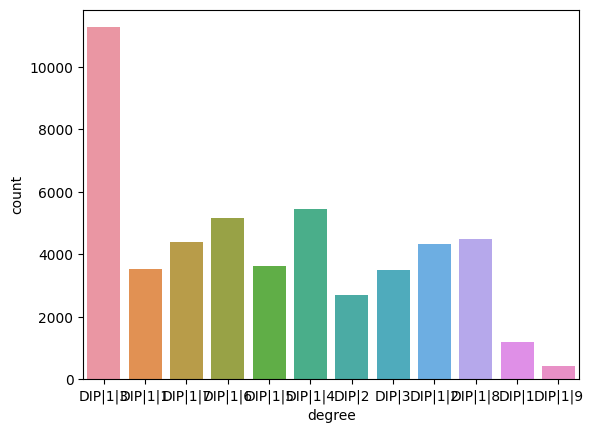

       household_type   Ratio
ft4-1           16715  33.430
ft4-4            9600  19.200
ft1-2            5658  11.316
ft4-2            4627   9.254
ft1-1            4277   8.554
ft3-2            4081   8.162
ft4-3            2919   5.838
ft2-0            1253   2.506
ft3-1             870   1.740
##########################################


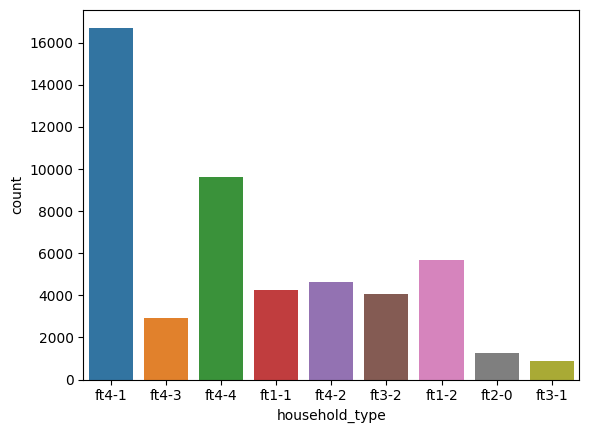

In [ ]:
for col in cat_cols:
    cat_summary(df_01,col)


On remarque par exemple qu'environ 48 % de personnes sont des actifs ayant un emploi, 27 % sont des retraités ou préretraités.

22 % n'ont aucun diplôme, 10 % ont un Baccalauréat général ou technologique, brevet supérieur, capacité en droit, DAEU, ESEU, environ 8% ont un master ou un diplôme d'ingénieur et moins de 1 % ont un doctorat de recherche.

19 % de ses personnes sont composées de familles principale composées d'un couple de deux 'actifs ayant un emploi' et 11% sont des femmes vivant seules et environ 8% sont des hommes vivant seuls.

Environ 88 % de ces personnes ne sont pas étudiants.




### Distribution de target moyen

Dans cette partie, je vais afficher la valeur moyenne de target pour chaque catégorie.

In [ ]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [ ]:
for col in cat_cols:
    target_summary_with_cat(df_01,"target",col)

               TARGET_MEAN
ACTIVITY_TYPE             
type1-1             38.985
type1-2             37.419
type2-1             44.136
type2-2             41.344
type2-4             50.012
type2-5             41.714


        TARGET_MEAN
sex                
Female       42.951
Male         38.692


            TARGET_MEAN
Is_student             
False            41.099
True             39.626


         TARGET_MEAN
degree              
DIP|1         42.824
DIP|1|1       44.247
DIP|1|2       38.829
DIP|1|3       41.065
DIP|1|4       41.764
DIP|1|5       40.813
DIP|1|6       39.043
DIP|1|7       42.522
DIP|1|8       38.354
DIP|1|9       38.344
DIP|2         42.618
DIP|3         40.889


                TARGET_MEAN
household_type             
ft1-1                39.146
ft1-2                42.318
ft2-0                38.970
ft3-1                41.994
ft3-2                38.855
ft4-1                41.207
ft4-2                39.092
ft4-3                38.508
ft4-4                43.03

### Distribution des variables numériques

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
   # quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    quantiles = [ 0.25,0.50, 0.75]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   50000.000
mean       48.895
std        20.301
min        15.000
25%        32.000
50%        48.000
75%        64.000
max       121.000
Name: AGE_2018, dtype: float64


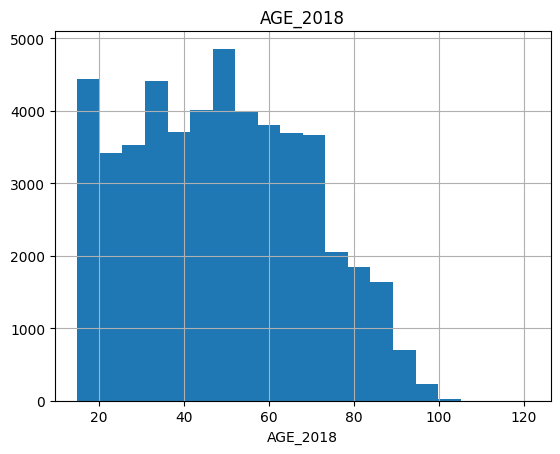

count   50000.000
mean       40.919
std         6.825
min         7.495
25%        36.722
50%        41.432
75%        45.471
max        71.381
Name: target, dtype: float64


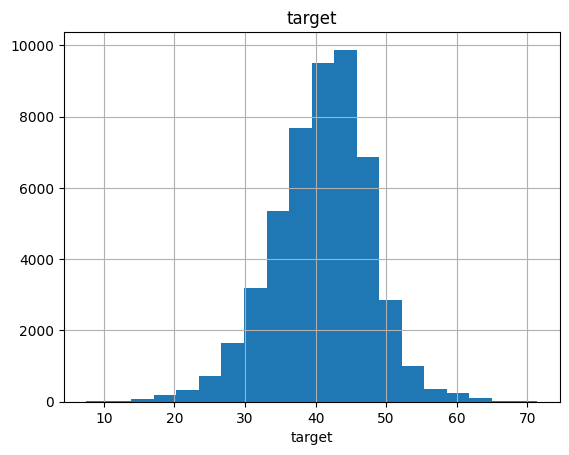

In [ ]:
for col in num_cols:
    num_summary(df_01,col,plot=True)

On peut remarquer que la variable cible semble être normalement distribuée.

## Fonctions utiles

Dans cette partie, on a regroupé des fonctions qui nous seront utiles, qui seront utilisées dans tout le projet.

### Corrélation entre variables numériques

In [ ]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(15, 15)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    fig = sns.heatmap(df[cols].corr(), annot=False, linewidths=0.3, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)



### Traitement de données manquantes

In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)

    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)

    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
def quick_missing_imp(data, num_method="median", cat_length=20, target="target"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]  # Les variables avec des valeurs manquantes sont listées
    temp_target = data[target]

    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")  # Nombre de valeurs manquantes des variables avant implémentation

    # Remplir les valeurs manquantes avec le mode si l'objet variable et le nombre de classes sont inférieurs ou égaux à cat_length
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)

    # Si num_method est la moyenne, les valeurs manquantes des variables de type non objet sont remplies avec la moyenne
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    # Si num_method est médian, les valeurs manquantes des variables de type non objet sont remplies avec la médiane
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    data[target] = temp_target

    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")

    return data


### Traitement de données abérentes

In [ ]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    if col != "target":
      print(col, check_outlier(df_01, col))

AGE_2018 False


### Encodage

Pour convertir les variables de type objet en valeurs enières de type binaire.

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe



In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe



## Préparer ce premier ensemble de données pour la modélisation

In [ ]:
binary_cols = [col for col in df_01.columns if df_01[col].dtypes == "O" and len(df_01[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df_01, col)

df_01 = one_hot_encoder(df_01, cat_cols, drop_first=True)

train_df_01 = df_01[df_01['target'].notnull()]
test_df_01 = df_01[df_01['target'].isnull()]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

On va diviser notre jeu d'entrainement en un jeu d'entrainement et une autre partie pour la validation.







### Sélectionner et entraîner un modèle

Réalisons tout d'abord l'entrainement sur un modèle de régression linéaire.

### Régression Linéaire

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model_1_regression = LinearRegression()
model_1_regression.fit(X_train, y_train)
y_prediction = model_1_regression.predict(X_test)

lin_mse = mean_squared_error(y_test, y_prediction)
lin_rmse = np.sqrt(lin_mse)
print(f"Sccore R2 / training data: {round(model_1_regression.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_1_regression.score(X_test, y_test)*100, 1)} %")
print("Racine carrée de l'erreur quadratique moyenne : ", lin_rmse)

Sccore R2 / training data: 36.7 %
Sccore R2 / validation data: 35.8 %
Racine carrée de l'erreur quadratique moyenne :  5.511156098618493


Le score $R^2$ est mauvais. Voyons maintenant avec un algorithme de type « DecisionTreeRegressor ».

### Arbre de décision

In [ ]:
model_1_tree_reg = DecisionTreeRegressor()
model_1_tree_reg.fit(X_train, y_train)
y_prediction = model_1_tree_reg.predict(X_test)
reg_mse = mean_squared_error(y_test, y_prediction)
reg_rmse = np.sqrt(reg_mse)
print(f"Sccore R2 / training data: {round(model_1_tree_reg.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_1_tree_reg.score(X_test, y_test)*100, 1)} %")
print("Racine carrée de l'erreur quadratique moyenne : ", reg_rmse)


Sccore R2 / training data: 56.7 %
Sccore R2 / validation data: 19.3 %
Racine carrée de l'erreur quadratique moyenne :  6.179899297326298


### Random forest

In [ ]:
model_1_rforest = RandomForestRegressor()
model_1_rforest.fit(X_train, y_train)
y_prediction = model_1_rforest.predict(X_test)
rforest_mse = mean_squared_error(y_test, y_prediction)
rforest_rmse = np.sqrt(rforest_mse)
print(f"Sccore R2 / training data: {round(model_1_rforest.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_1_rforest.score(X_test, y_test)*100, 1)} %")
print("Racine carrée de l'erreur quadratique moyenne : ", rforest_rmse)

Sccore R2 / training data: 55.1 %
Sccore R2 / validation data: 28.5 %
Racine carrée de l'erreur quadratique moyenne :  5.818578759499939


**Conclusion** : Pour cette première partie d'étude, notre score est mauvis pour les différents modèles, on remarque aussi un sur-ajustement des modèls : arbres de décision et le random forest.

Les variables qui ont été ignorées sont peut-être significatives pour expliquer la variable cible. On va les utiliser par la suite et nous allons à nouveau évaluer notre modèle.


# Partie II : Utilisation de données géographiques
Dans cette partie, on va tenir en compte les données géographiques sur les personnes. On va d'abord fusionner les données informations administratives, les informations géographique et les données qui contiennent les informations sur la population.

In [ ]:
df_loc_géog=pd.read_csv("/content/drive/MyDrive/projet MLfiles/city_loc.csv")
df_city_adm= pd.read_csv("/content/drive/MyDrive/projet MLfiles/city_adm.csv")
df_pop= pd.read_csv("/content/drive/MyDrive/projet MLfiles/city_pop.csv")
df_ins=pd.merge(df_pop , df_city_adm,  on='Insee')
df_insee=pd.merge(df_ins, df_loc_géog, on='Insee')
df_insee.head()


,Insee,INHABITANTS,Nom de la commune,town_type,DEP,X,Y,lat,long
0,01001,785,L' Abergement-Clémenciat,Commune simple,01,848637.261,6563324.789,46.153,4.926
1,01002,241,L' Abergement-de-Varey,Commune simple,01,887850.413,6548382.507,46.009,5.428
2,01004,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373
3,01005,1658,Ambérieux-en-Dombes,Commune simple,01,847992.215,6545841.729,45.996,4.912
4,01006,115,Ambléon,Commune simple,01,901659.775,6519968.668,45.749,5.594


On va aditiionner ces informations à l'ensemble de données sur les personnens en utilisant le code "Insee".

In [ ]:
df_pers_insee=pd.merge(df_pers, df_insee, on='Insee')
df_pers_insee.head()

,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,INHABITANTS,Nom de la commune,town_type,DEP,X,Y,lat,long
0,1,type1-1,44,Male,csp_4_5,False,DIP|1|3,ft4-1,01004,33.179,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373
1,3,type2-1,52,Male,csp_7_7,False,DIP|1|1,ft4-3,01004,42.306,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373
2,5,type2-1,80,Male,csp_7_4,False,DIP|1|7,ft4-4,01004,45.922,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373
3,7,type1-1,58,Male,csp_2_2,False,DIP|1|6,ft1-1,01004,39.303,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373
4,11,type1-1,42,Male,csp_6_7,False,DIP|1|3,ft1-1,01004,28.623,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373


In [ ]:
d=df_pers_insee.copy()

### Visualisation des données géographiques

Nous allos examiner le target, le rayon de chaque cercle correspond à la population de la ville (option s).

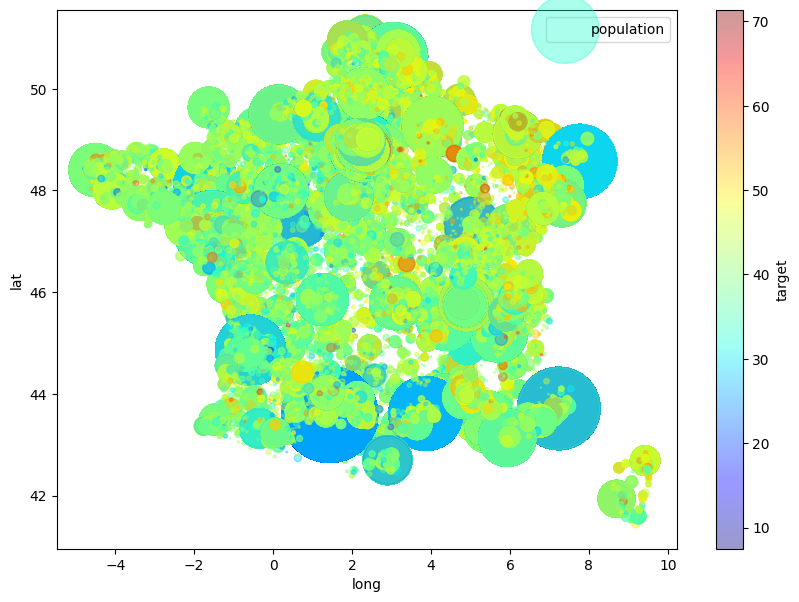

In [ ]:
d.plot(kind="scatter", x="long", y="lat", alpha=0.4,
             s=d["INHABITANTS"]/100, label="population", figsize=(10,7),
             c="target", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

Cette image montre que la valeur du target est liée à la localisation ainsi qu'à la densité de la population de la ville.

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(d)

Observations: 50000
Variables: 18
cat_cols: 6
num_cols: 8
cat_but_car: 4
num_but_cat: 2


In [ ]:
for col in cat_cols:
    target_summary_with_cat(d,"target",col)


                      TARGET_MEAN
town_type                        
Capitale d'état            36.020
Chef-lieu canton           41.875
Commune simple             41.891
Préfecture                 37.975
Préfecture de région       35.068
Sous-préfecture            41.986




### Préparer ce deuxième ensemble de données pour les algorithmes d'apprentissage automatique



In [ ]:
binary_cols = [col for col in d.columns if d[col].dtypes == "O" and len(d[col].unique()) == 2]

for col in binary_cols:
    label_encoder(d, col)

d = one_hot_encoder(d, cat_cols, drop_first=True)

train_d = d[d['target'].notnull()]
test_d= d[d['target'].isnull()]

y = train_d['target']
X = train_d.drop([ 'UID','OCCUPATION_42', "target", 'Insee', 'Nom de la commune','DEP', 'OCCUPATION_42'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


### Modèle linéaire

In [ ]:
model_01_regression = LinearRegression()
model_01_regression.fit(X_train, y_train)
y_prediction = model_01_regression.predict(X_test)

lin_mse = mean_squared_error(y_test, y_prediction)
lin_rmse = np.sqrt(lin_mse)
print(f"Sccore R2 / training data: {round(model_01_regression.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_01_regression.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", lin_rmse)




Sccore R2 / training data: 55.4 %
Sccore R2 / validation data: 55.3 %
RMSE :  4.602293814443249


### Arbre de décision

In [ ]:
model_01_tree_reg = DecisionTreeRegressor()
model_01_tree_reg.fit(X_train, y_train)
y_prediction = model_01_tree_reg.predict(X_test)
reg_mse = mean_squared_error(y_test, y_prediction)
reg_rmse = np.sqrt(reg_mse)
print(f"Sccore R2 / training data: {round(model_01_tree_reg.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_01_tree_reg.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", reg_rmse)




Sccore R2 / training data: 99.9 %
Sccore R2 / validation data: 10.4 %
RMSE :  6.513745767515009


### Random forest

In [ ]:
model_01_rforest = RandomForestRegressor()
model_01_rforest.fit(X_train, y_train)
y_prediction = model_01_rforest.predict(X_test)
rforest_mse = mean_squared_error(y_test, y_prediction)
rforest_rmse = np.sqrt(rforest_mse)
print(f"Sccore R2 / training data: {round(model_01_rforest.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_01_rforest.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", rforest_rmse)

Sccore R2 / training data: 93.6 %
Sccore R2 / validation data: 55.0 %
RMSE :  4.613248696093138


**Conclusion** : On a amélioré le modèle initial en complétant les informations sur les personnes, par les données géographiques, cependant le score $R2$ reste plutôt mauvais !

On va maintenant essayer de voir si notre modèle sera amélioré en prenant en compte la variable sur la catégorie socioprofessionnelle (norme PCS 2003).






# Partie III : Utilisation de la variable Occupation_42

On va utiliser la variable, qui a été ignoré dans le premier modèle "Occupation_42", qui donne des informations sur la catégorie socioprofessionnelle (norme PCS 2003). Cependant cette variable contient 42 modalités différentes. On va utiliser des données externes (du site de l'Insee)qui permettent de regrouper les 42 modalités dans 8 groupes socioprofessionnels : 8 postes (dont 6 pour les actifs), correspondant au premier chiffre de la PCS 2003.



In [ ]:
code_OCCUPATION_pcs2003=pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_OCCUPATION_pcs2003")
code_OCCUPATION_pcs2003.head()

,OCCUPATION_42,Groupe_N1
0,csp_1_1,1
1,csp_1_2,1
2,csp_1_3,1
3,csp_2_1,2
4,csp_2_2,2


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(code_OCCUPATION_pcs2003)

Observations: 42
Variables: 2
cat_cols: 1
num_cols: 0
cat_but_car: 1
num_but_cat: 1


   Groupe_N1  Ratio
4          7 16.667
6          7 16.667
3          6 14.286
7          6 14.286
5          5 11.905
8          5 11.905
1          3  7.143
2          3  7.143
##########################################


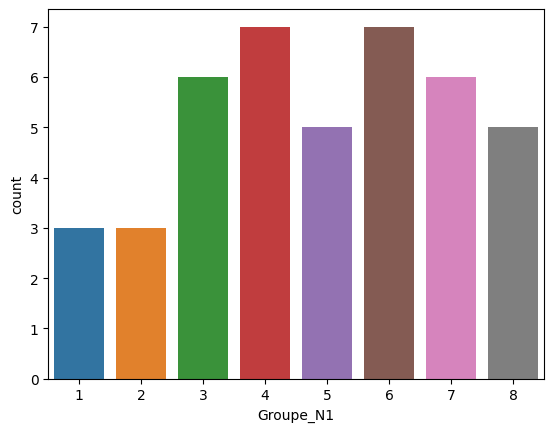

In [ ]:
for col in cat_cols:
    cat_summary(code_OCCUPATION_pcs2003,col)

On crée un nouvel ensemble des personnes avec ces groupes socioprofessionnels.

In [ ]:
df_pers_ins_occup=pd.merge(df_pers_insee, code_OCCUPATION_pcs2003, on='OCCUPATION_42')
df_pers_ins_occup.head()

,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,INHABITANTS,Nom de la commune,town_type,DEP,X,Y,lat,long,Groupe_N1
0,1,type1-1,44,Male,csp_4_5,False,DIP|1|3,ft4-1,01004,33.179,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373,4
1,836,type1-1,44,Female,csp_4_5,False,DIP|1|6,ft4-1,01393,35.983,519,Sandrans,Commune simple,01,853257.500,6553693.770,46.066,4.983,4
2,919,type1-1,47,Female,csp_4_5,False,DIP|1|4,ft4-1,01447,43.453,1351,Villereversure,Commune simple,01,884660.923,6568670.975,46.193,5.395,4
3,1231,type1-1,31,Female,csp_4_5,False,DIP|1|7,ft1-2,02309,43.880,664,Festieux,Commune simple,02,755057.209,6936481.589,49.525,3.760,4
4,1631,type1-1,39,Female,csp_4_5,False,DIP|1|6,ft4-1,02711,45.056,321,Serches,Commune simple,02,732681.376,6914814.762,49.332,3.450,4


In [ ]:
df_04=df_pers_ins_occup.copy()

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_04)

Observations: 50000
Variables: 19
cat_cols: 7
num_cols: 8
cat_but_car: 4
num_but_cat: 2


**Modélisation**

In [ ]:
drop_list = ["UID", "OCCUPATION_42", "Insee", "DEP","Nom de la commune"]

df_04.drop(drop_list, axis=1, inplace=True)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_04)

Observations: 50000
Variables: 14
cat_cols: 7
num_cols: 7
cat_but_car: 0
num_but_cat: 2


In [ ]:
binary_cols = [col for col in df_04.columns if df_04[col].dtypes == "O" and len(df_04[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df_04, col)

df_04 = one_hot_encoder(df_04, cat_cols, drop_first=True)


train_df_04 = df_04[df_04['target'].notnull()]
test_df_04 = df_04[df_04['target'].isnull()]

y = train_df_04['target']
X = train_df_04.drop(["target"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Modèle linéaire**

In [ ]:

model_03_regression = LinearRegression()
model_03_regression.fit(X_train, y_train)
y_prediction = model_03_regression.predict(X_test)

lin_mse = mean_squared_error(y_test, y_prediction)
lin_rmse = np.sqrt(lin_mse)
print(f"Sccore R2 / training data: {round(model_03_regression.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_03_regression.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", lin_rmse)


Sccore R2 / training data: 69.3 %
Sccore R2 / validation data: 70.0 %
RMSE :  3.7569752728289405


In [ ]:
plot_importance(model_03_regression, X,num=20)

**Arbre de décision**

In [ ]:
model_03_tree_reg = DecisionTreeRegressor()
model_03_tree_reg.fit(X_train, y_train)
y_prediction = model_03_tree_reg.predict(X_test)
reg_mse = mean_squared_error(y_test, y_prediction)
reg_rmse = np.sqrt(reg_mse)
print(f"Sccore R2 / training data: {round(model_03_tree_reg.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_03_tree_reg.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", reg_rmse)


Sccore R2 / training data: 100.0 %
Sccore R2 / validation data: 45.8 %
RMSE :  5.054321724351468


**Fôrets aléatoires**

In [ ]:
model_03_rforest = RandomForestRegressor()
model_03_rforest.fit(X_train, y_train)
y_prediction = model_03_rforest.predict(X_test)
rforest_mse = mean_squared_error(y_test, y_prediction)
rforest_rmse = np.sqrt(rforest_mse)
print(f"Sccore R2 / training data: {round(model_03_rforest.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_03_rforest.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", rforest_rmse)

Sccore R2 / training data: 96.0 %
Sccore R2 / validation data: 72.0 %
RMSE :  3.635000342245044


**Conclusion** : Les forêts aléatoires semblent meuilleurs ! Notons toujours que le score obtenu sur le jeu d'entraînement est toujours très inferieur à ceux obtenus sur le jeux de validation, ce qui signifie que le modèle surajuste toujours sur le jeu d'entraînement.

### Réglage avec précision

On va maintenant, régler avec précision le modèle qui sera utiliser sur le jeu de test pour l'ensemble de personnes qui n'ont pas d'emploi.

**Récherche par quadrillage**


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

#model_03_rforest= RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(model_03_rforest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Regardons le score de chaque combinaison d'hyperparamètres testée lors de la recherche sur la grille :

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.6510305237617535 {'max_features': 2, 'n_estimators': 3}
4.0640712636540375 {'max_features': 2, 'n_estimators': 10}
3.9072498955535955 {'max_features': 2, 'n_estimators': 30}
4.501654138684996 {'max_features': 4, 'n_estimators': 3}
3.953020424046007 {'max_features': 4, 'n_estimators': 10}
3.779833674237172 {'max_features': 4, 'n_estimators': 30}
4.4108766851421555 {'max_features': 6, 'n_estimators': 3}
3.881052075225438 {'max_features': 6, 'n_estimators': 10}
3.729441160422153 {'max_features': 6, 'n_estimators': 30}
4.340170448737287 {'max_features': 8, 'n_estimators': 3}
3.8564819314960443 {'max_features': 8, 'n_estimators': 10}
3.7113723546867585 {'max_features': 8, 'n_estimators': 30}
4.637831996396668 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.068104192029171 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.469152564816491 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.985937590254373 {'bootstrap': False, 'max_features': 3, 'n_estimator

Ici la meuilleure solution est obtenue en donnat à l'hyperparamètre max_feautures la valeur 8, et à l'hypèrparamètre n_estimators la valeur 30. le score RMSE pour cette combinaison est de 3.71137, legérement au deçu du score 3.628117 obtenu précédement pour les valeurs par défaut des hyperparamètres.

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07373078, 0.12932778, 0.05835276, 0.05643878, 0.05703038,
       0.05667881, 0.00965286, 0.02332905, 0.00207412, 0.02841733,
       0.00258136, 0.07836826, 0.00210051, 0.01578792, 0.00682697,
       0.00584547, 0.00559512, 0.00635873, 0.01257812, 0.00798517,
       0.00116846, 0.00188967, 0.00364199, 0.00397759, 0.00229663,
       0.00464135, 0.00763673, 0.03428791, 0.00989705, 0.00528577,
       0.00464474, 0.0068378 , 0.00584294, 0.0066236 , 0.02543801,
       0.00488185, 0.01217844, 0.05687477, 0.00712002, 0.05066861,
       0.01181148, 0.04607383, 0.0281302 , 0.01909027])

In [ ]:
final_model_1= grid_search.best_estimator_

In [ ]:
pd.DataFrame(grid_search.cv_results_)

C'est bien mieux On va regeler ce modèle, car ce sera appliqué à l'ensemble test pour prédir la variable target pour les personnes n'ayant pas d'emploi.

In [ ]:
cross_val_score(model_03_rforest , X_train, y_train, cv=10, scoring=make_scorer(r2_score))

array([0.70813653, 0.70025065, 0.713302  , 0.70659724, 0.71336989,
       0.70438142, 0.71732437, 0.71433486, 0.69605593, 0.7175757 ])

Conclusion : On a nettement amelioré notre modèle ici.

Voyons les variables qui ont contribué le plus sur la construction des modeles.

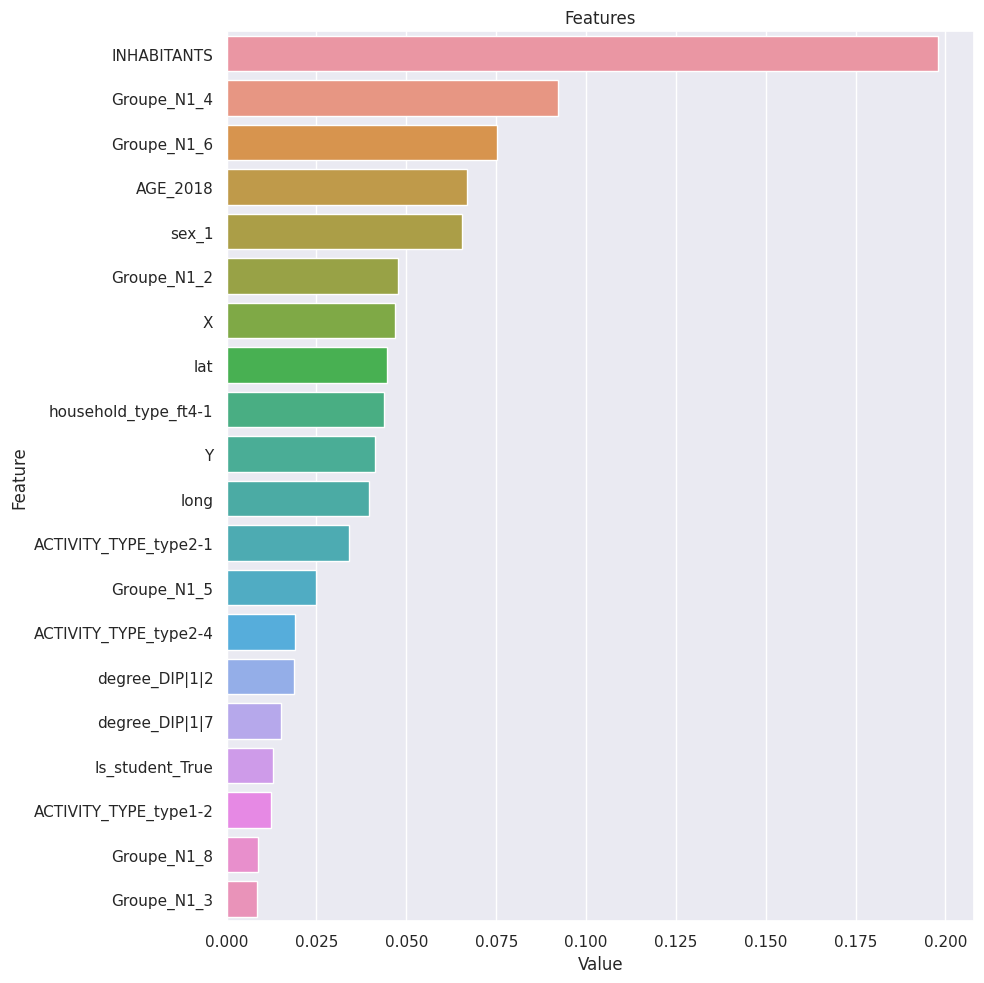

In [ ]:
plot_importance(model_03_rforest, X,num=20)

# Partie IV : Utilisation des données sur les emplois actuels

On va d'abord examiner les données dans l'ensemble JOB, qui contient les emplois actuels des personnes ayant un statut de salarié, puis on ajoutera ces informations aux personnes concernées dans l'ensemble de données initial.






In [ ]:
df_job= pd.read_csv("/content/drive/MyDrive/projet MLfiles/learn_dataset_job.csv")
df_job.head()

,UID,JOB_CATEGORY,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description
0,1,O,71,1838.000,HZ,CDI,ct_9,20794,C,tr_5,451a
1,11,O,01,378.000,NZ,TTP,ct_9,14514,C,tr_1,674a
2,40,O,69,1958.000,QA,CDI,ct_9,21847,C,tr_6,526a
3,48,O,69,1818.000,CH,CDI,ct_9,22790,P,tr_2,542a
4,52,O,38,1843.000,CB,CDI,ct_9,27498,C,tr_6,627a


   JOB_CATEGORY  Ratio
O         18923 96.487
X           395  2.014
A           294  1.499
##########################################


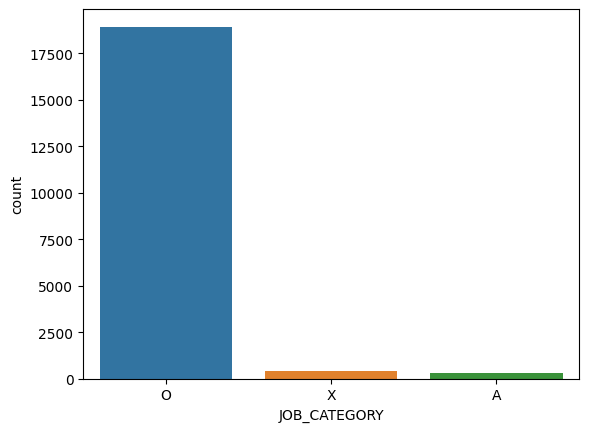

     Terms_of_emp  Ratio
CDI         16901 86.177
AUT          1176  5.996
CDD           727  3.707
TTP           323  1.647
APP           288  1.468
TOA           197  1.004
##########################################


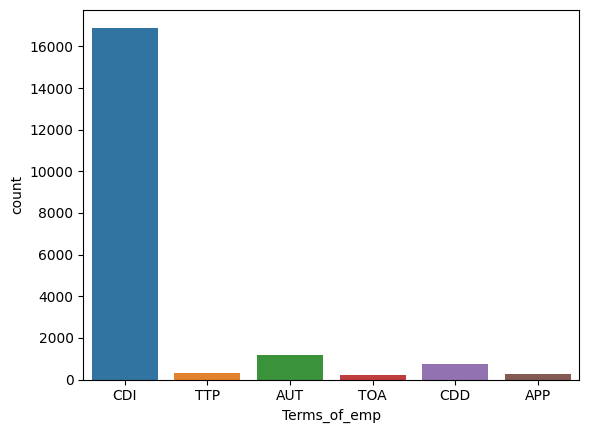

      Employer_type  Ratio
ct_9          12942 65.990
ct_8           3076 15.684
ct_6           1243  6.338
ct_7            553  2.820
ct_2            514  2.621
ct_1            489  2.493
ct_3            441  2.249
ct_5            245  1.249
ct_4            109  0.556
##########################################


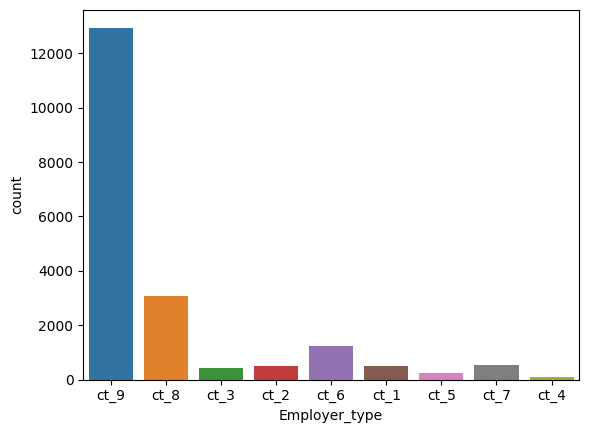

   JOB_CONDITION  Ratio
C          15349 78.263
P           3677 18.749
D            219  1.117
F            199  1.015
K             99  0.505
Y             69  0.352
##########################################


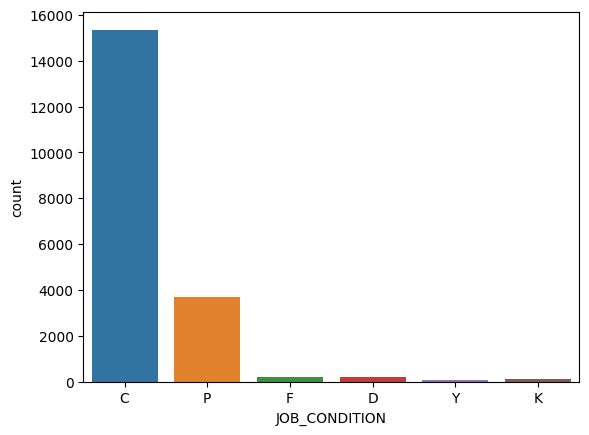

      employee_count  Ratio
tr_1            4449 22.685
tr_6            4361 22.236
tr_3            3188 16.255
tr_5            2632 13.420
tr_4            2486 12.676
tr_2            2181 11.121
tr_0             315  1.606
##########################################


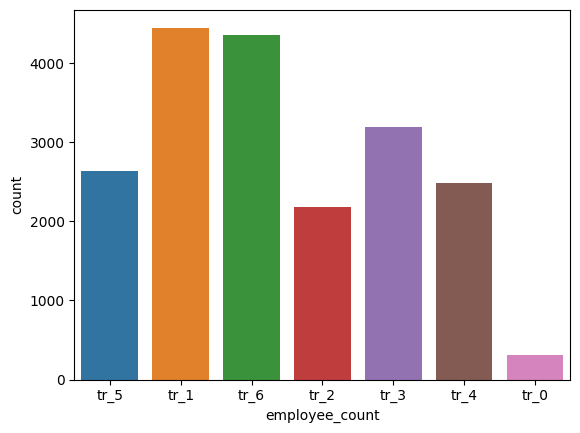

count   19547.000
mean     1601.929
std       533.880
min         1.000
25%      1404.000
50%      1819.000
75%      1855.000
max      3000.000
Name: Working_hours, dtype: float64


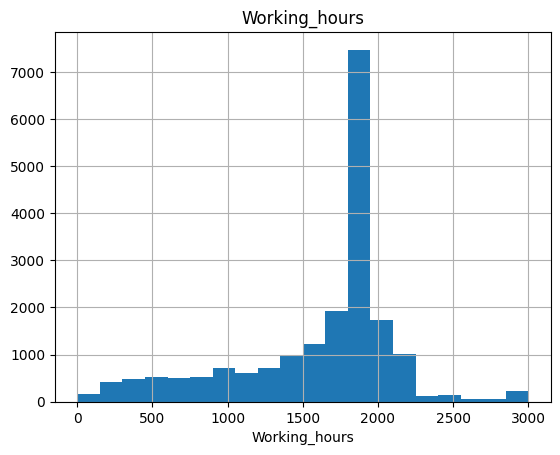

count    19612.000
mean     22812.982
std      13358.865
min         14.000
25%      14562.750
50%      20186.000
75%      28118.750
max     148739.000
Name: Emolument, dtype: float64


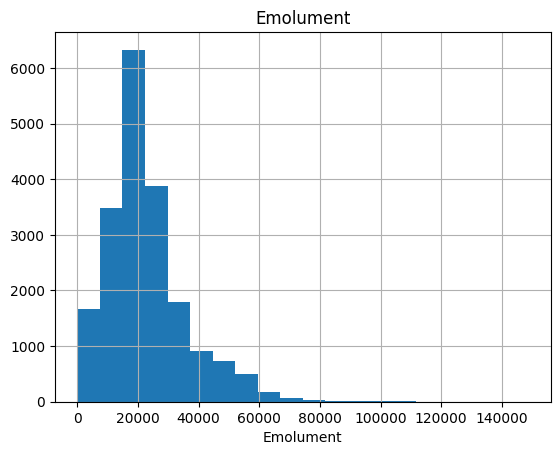

In [ ]:
for col in cat_cols:
    cat_summary(df_02,col)
for col in num_cols:
    num_summary(df_02,col,plot=True)


Sur cet ensemble on'ajoutera les codes liées à la variable "Work_description".

In [ ]:
code_Work_description_map= pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_Work_description_map.csv")
code_Work_description_map=code_Work_description_map.rename(columns={ 'N3': 'Work_description' })
df_JOB= pd.merge(df_job,code_Work_description_map, on= 'Work_description')
df_JOB.head()

,UID,JOB_CATEGORY,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description,N2,N1
0,1,O,71,1838.000,HZ,CDI,ct_9,20794,C,tr_5,451a,45,4
1,836,O,69,1820.000,HZ,CDI,ct_9,20394,C,tr_6,451a,45,4
2,3087,O,06,1814.000,HZ,CDI,ct_9,21177,C,tr_6,451a,45,4
3,3630,O,06,1821.000,HZ,CDI,ct_9,19420,C,tr_2,451a,45,4
4,3775,O,06,1781.000,HZ,CDI,ct_9,26284,C,tr_6,451a,45,4


On reprend les fonctions crées dans la premiere partie pour analyser ces nouvelles données.

In [ ]:
df_02=df_JOB.copy()

In [ ]:
df_02.drop(columns=["UID"],axis=1,inplace=True)

In [ ]:
check_df(df_02)

##########################################  SHAPE ##########################################
(19612, 12)
##########################################  Types ##########################################
JOB_CATEGORY         object
JOB_DEP              object
Working_hours       float64
eco_sect             object
Terms_of_emp         object
Employer_type        object
Emolument             int64
JOB_CONDITION        object
employee_count       object
Work_description     object
N2                    int64
N1                    int64
dtype: object
######################################### NA ##########################################
JOB_CATEGORY         0
JOB_DEP              0
Working_hours       65
eco_sect             0
Terms_of_emp         0
Employer_type        0
Emolument            0
JOB_CONDITION        0
employee_count       0
Work_description     0
N2                   0
N1                   0
dtype: int64
##########################################  NUMBERUNIQE ###################

Ici, on a un ensemble de 19612 lignes et 11 variables, seule la variable "Working_hours" presente 65 valeurs manquantes.


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df_02)

Observations: 19612
Variables: 13
cat_cols: 6
num_cols: 4
cat_but_car: 3
num_but_cat: 1


### Distribution de variables catégorielles

   JOB_CATEGORY  Ratio
O         18923 96.487
X           395  2.014
A           294  1.499
##########################################


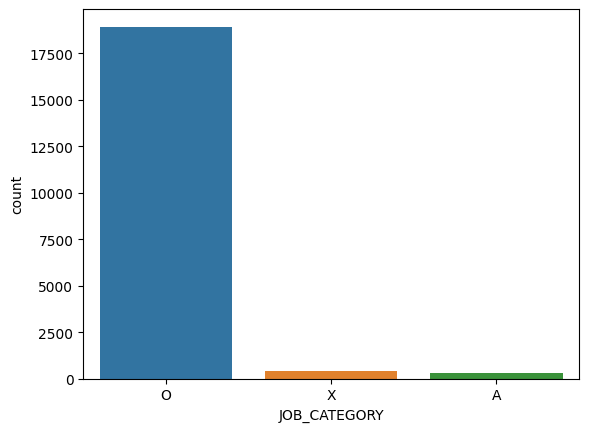

     Terms_of_emp  Ratio
CDI         16901 86.177
AUT          1176  5.996
CDD           727  3.707
TTP           323  1.647
APP           288  1.468
TOA           197  1.004
##########################################


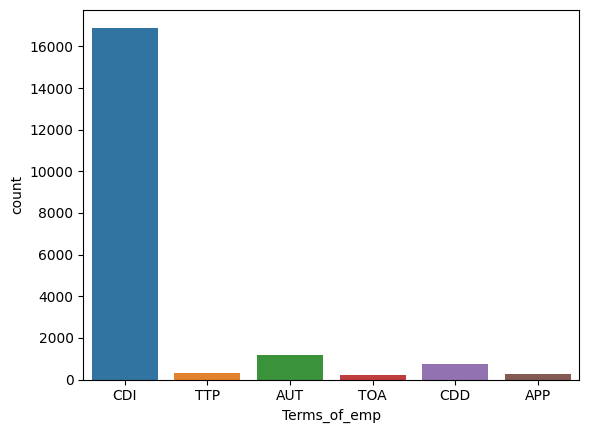

      Employer_type  Ratio
ct_9          12942 65.990
ct_8           3076 15.684
ct_6           1243  6.338
ct_7            553  2.820
ct_2            514  2.621
ct_1            489  2.493
ct_3            441  2.249
ct_5            245  1.249
ct_4            109  0.556
##########################################


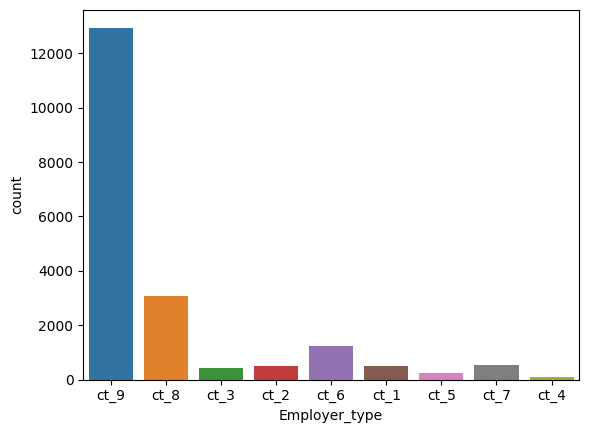

   JOB_CONDITION  Ratio
C          15349 78.263
P           3677 18.749
D            219  1.117
F            199  1.015
K             99  0.505
Y             69  0.352
##########################################


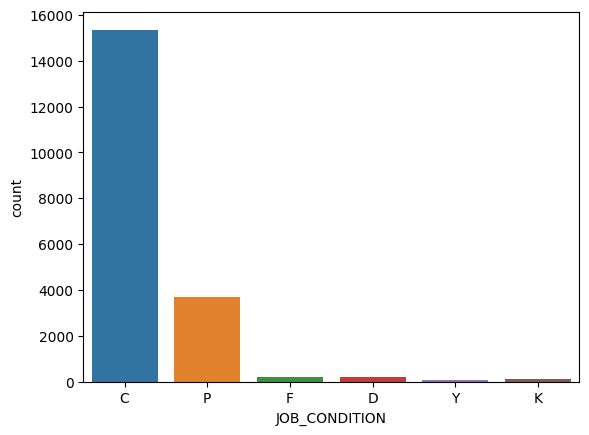

      employee_count  Ratio
tr_1            4449 22.685
tr_6            4361 22.236
tr_3            3188 16.255
tr_5            2632 13.420
tr_4            2486 12.676
tr_2            2181 11.121
tr_0             315  1.606
##########################################


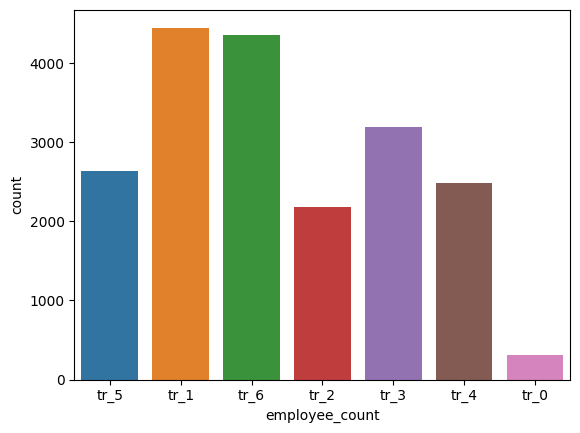

In [ ]:
for col in cat_cols:
    cat_summary(df_job,col)

### Distribution de variables numériques

count   19547.000
mean     1601.929
std       533.880
min         1.000
5%        428.000
10%       719.000
20%      1202.000
30%      1543.000
40%      1744.000
50%      1819.000
60%      1820.000
70%      1828.000
80%      1911.000
90%      2039.000
95%      2200.000
99%      3000.000
max      3000.000
Name: Working_hours, dtype: float64


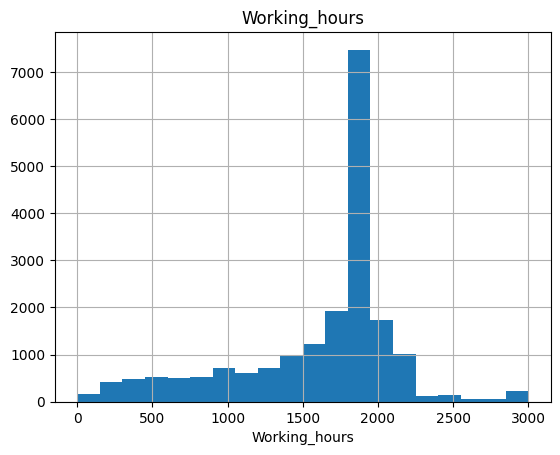

count    19612.000
mean     22812.982
std      13358.865
min         14.000
5%        5193.850
10%       8446.100
20%      13044.000
30%      15843.600
40%      17916.400
50%      20186.000
60%      22778.600
70%      25994.400
80%      30906.000
90%      40383.000
95%      50812.400
99%      64627.900
max     148739.000
Name: Emolument, dtype: float64


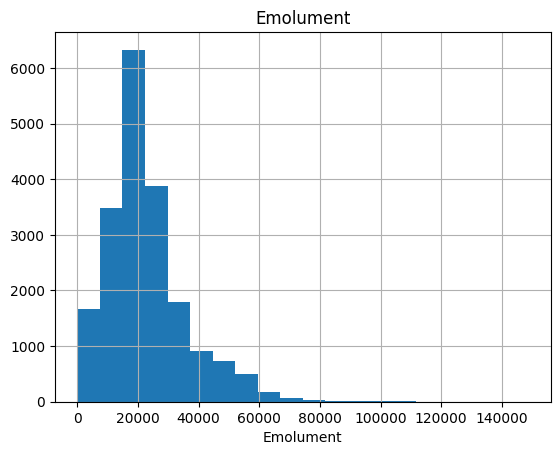

In [ ]:
for col in num_cols:
    num_summary(df_02,col,plot=True)

On va maintenant créer un ensemble composé de données sur les personnes et leurs emplois actuels.

In [ ]:
#data personnes+jobs
df_pers_job = pd.merge(df_pers_ins_occup, df_JOB, on='UID')
df_pers_job.head()


,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,INHABITANTS,Nom de la commune,town_type,DEP,X,Y,lat,long,Groupe_N1,JOB_CATEGORY,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description,N2,N1
0,1,type1-1,44,Male,csp_4_5,False,DIP|1|3,ft4-1,01004,33.179,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373,4,O,71,1838.000,HZ,CDI,ct_9,20794,C,tr_5,451a,45,4
1,836,type1-1,44,Female,csp_4_5,False,DIP|1|6,ft4-1,01393,35.983,519,Sandrans,Commune simple,01,853257.500,6553693.770,46.066,4.983,4,O,69,1820.000,HZ,CDI,ct_9,20394,C,tr_6,451a,45,4
2,1631,type1-1,39,Female,csp_4_5,False,DIP|1|6,ft4-1,02711,45.056,321,Serches,Commune simple,02,732681.376,6914814.762,49.332,3.450,4,O,02,1820.000,PZ,AUT,ct_1,21816,C,tr_4,451e,45,4
3,3087,type1-1,43,Female,csp_4_5,False,DIP|1|6,ft3-2,06027,30.909,48264,Cagnes-sur-Mer,Chef-lieu canton,06,1034842.134,6294637.905,43.672,7.153,4,O,06,1814.000,HZ,CDI,ct_9,21177,C,tr_6,451a,45,4
4,3366,type1-1,50,Male,csp_4_5,False,DIP|1|5,ft4-1,06048,30.531,7488,Contes,Chef-lieu canton,06,1047817.801,6310668.594,43.809,7.324,4,O,06,1820.000,OZ,CDI,ct_2,20790,C,tr_6,451g,45,4


In [ ]:
df_pers_job=df_pers_job.rename(columns={ 'Groupe_N1': 'N1_Occupation42' , 'N1':'N1_Work_description'})
df_O3=df_pers_job.copy()
cat_cols, num_cols, cat_but_car = grab_col_names(df_O3)

Observations: 19612
Variables: 31
cat_cols: 13
num_cols: 11
cat_but_car: 7
num_but_cat: 3


Pour la variable "Work_description" qui possède plus de 20 modalités, je la remplacerai par le code N1

Dans cet nouvouvel ensemble de données, On a 19612 lignes et 19 variables, dont 14 sont categoriellles et seule la variable "Working_hours" contient des valeurs manquantes.

In [ ]:
df_03 = quick_missing_imp(df_O3, num_method="median", cat_length=17)

# BEFORE
Working_hours    65
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

Working_hours    0
dtype: int64 




### Préparer cet ensemble de données pour la modélisation

In [ ]:
drop_list = ["UID", "OCCUPATION_42", "Insee", "JOB_DEP", "Work_description","N2","eco_sect", "Nom de la commune",'DEP']
df_03.drop(drop_list, axis=1, inplace=True)
cat_cols, cat_but_car, num_cols = grab_col_names(df_03)
binary_cols = [col for col in df_03.columns if df_03[col].dtypes == "O" and len(df_03[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df_03, col)

df_03 = one_hot_encoder(df_03, cat_cols, drop_first=True)

train_df_03 = df_03[df_03['target'].notnull()]
test_df_03 = df_03[df_03['target'].isnull()]

y = train_df_03['target'] # np.log1p(df['SalePrice'])
X = train_df_03.drop(["target"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


Observations: 19612
Variables: 22
cat_cols: 13
num_cols: 9
cat_but_car: 0
num_but_cat: 3


### Modèle linéarire

In [ ]:
model_4_regression = LinearRegression()
model_4_regression.fit(X_train, y_train)
y_prediction = model_4_regression.predict(X_test)
lin_mse = mean_squared_error(y_test, y_prediction)
lin_rmse = np.sqrt(lin_mse)
print(f"Sccore R2 / training data: {round(model_4_regression.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_4_regression.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", lin_rmse)

Sccore R2 / training data: 77.6 %
Sccore R2 / validation data: 78.3 %
RMSE :  2.9761426849823107


**Validation croisée**

In [ ]:
cross_val_score(model_4_regression , X_train, y_train, cv=10, scoring=make_scorer(r2_score))

array([0.77731788, 0.76164556, 0.77280115, 0.75958217, 0.76682921,
       0.78775931, 0.7736604 , 0.78227459, 0.77593475, 0.77945791])

**Arbre de décision**

In [ ]:
model_4_tree_reg = DecisionTreeRegressor()
model_4_tree_reg.fit(X_train, y_train)
y_prediction = model_4_tree_reg.predict(X_test)
reg_mse = mean_squared_error(y_test, y_prediction)
reg_rmse = np.sqrt(reg_mse)
print(f"Sccore R2 / training data: {round(model_4_tree_reg.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_4_tree_reg.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", reg_rmse)

Sccore R2 / training data: 100.0 %
Sccore R2 / validation data: 51.6 %
RMSE :  4.43983382529487


Le modèle d'arbre de décision représente un cas clair de surajustement ; la précision d’entraînement est très élevée, mais la précision de test l’est beaucoup moins.

**Validation croisée**

In [ ]:
cross_val_score(model_4_tree_reg, X_train, y_train, cv=10, scoring=make_scorer(r2_score))

array([0.51067297, 0.51993103, 0.52050152, 0.50754723, 0.47799375,
       0.54082528, 0.51050885, 0.5486208 , 0.50463235, 0.47036472])

Le modèle d'arbe de décision suajuste consdérablement les données.

Esseyons maintenant un dernier modèle : le RandomForestRegressor.

In [ ]:
model_4_rforest = RandomForestRegressor()
model_4_rforest.fit(X_train, y_train)
y_prediction = model_4_rforest.predict(X_test)
rforest_mse = mean_squared_error(y_test, y_prediction)
rforest_rmse = np.sqrt(rforest_mse)
print(f"Sccore R2 / training data: {round(model_4_rforest.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_4_rforest.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", rforest_rmse)

Sccore R2 / training data: 96.7 %
Sccore R2 / validation data: 76.6 %
RMSE :  3.090080276279776


### Améliorer l'évaluation par la validation croisée

In [ ]:
from sklearn.metrics import make_scorer, r2_score

L'arbe de décision ne donne plus d'aussi bon résultats que précédement.

### Analyser les meilleurs modèles et leurs erreurs

# Partie V : Utilisation des données sur le sport

Dans cette partie, on va prendre en compte les informations liées aux personnes qui pratiquent le sport dans des clubs.

### Data Sport

In [ ]:
df_sport=pd.read_csv("/content/drive/MyDrive/projet MLfiles/learn_dataset_sport.csv")
df_sport.head()

,UID,Sports
0,54,club.117
1,66,club.245
2,102,club.219
3,103,club.111
4,111,club.403


In [ ]:
df_sport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7711 entries, 0 to 7710
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UID     7711 non-null   int64 
 1   Sports  7711 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.6+ KB


Je vais fusionner les ensembles de données de sport et code de sports.

In [ ]:
#df: Sports+code
df_sport=pd.read_csv("/content/drive/MyDrive/projet MLfiles/learn_dataset_sport.csv")
code_sport=pd.read_csv("/content/drive/MyDrive/projet MLfiles/code_Sports.csv")
code_sport=code_sport.rename(columns={ 'Code': 'Sports' , 'Categorie': 'Sports_categorie'})
df_05 = pd.merge(code_sport, df_sport, on='Sports')
df_05.head()

,Sports,Sports_categorie,Nom fédération,Nom catégorie,UID
0,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique,477
1,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique,1827
2,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique,2927
3,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique,3494
4,club.101,1,Fédération française d'athlétisme,Fédération unisport olympique,3521


Par la suite je vais créer un ensemble de donnees, rassemblant les personnes, leurs emplois actuels et leurs catégries sportives en utilisant la clé "UID".

In [ ]:
df_pers_sport=pd.merge(df_pers_ins_occup, df_05, on='UID')
df_6=df_pers_sport.copy()
df_6.head()

In [ ]:
drop_list = ['OCCUPATION_42', 'Nom de la commune','DEP','Sports', 'UID', 'Insee', 'Nom fédération','Nom catégorie']

df_6.drop(drop_list, axis=1, inplace=True)

cat_cols, num_cols, cat_but_car = grab_col_names(df_6)

binary_cols = [col for col in df_6.columns if df_6[col].dtypes == "O" and len(df_6[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df_6, col)

df_6 = one_hot_encoder(df_6, cat_cols, drop_first=True)


train_df_6 = df_6[df_6['target'].notnull()]
test_df_6 = df_6[df_6['target'].isnull()]

y = train_df_6['target']
X = train_df_6.drop(["target"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [ ]:
# Modèle linéaire
model_6_regression = LinearRegression()
model_6_regression.fit(X_train, y_train)
y_prediction = model_6_regression.predict(X_test)

lin_mse = mean_squared_error(y_test, y_prediction)
lin_rmse = np.sqrt(lin_mse)
print(f"Sccore R2 / training data: {round(model_6_regression.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_6_regression.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", lin_rmse)

Sccore R2 / training data: 68.7 %
Sccore R2 / validation data: 68.4 %
RMSE :  3.8162230113963664


In [ ]:
# Arbre de décision
model_6_tree_reg = DecisionTreeRegressor()
model_6_tree_reg.fit(X_train, y_train)
y_prediction = model_6_tree_reg.predict(X_test)
reg_mse = mean_squared_error(y_test, y_prediction)
reg_rmse = np.sqrt(reg_mse)
print(f"Sccore R2 / training data: {round(model_6_tree_reg.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_6_tree_reg.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", reg_rmse)

Sccore R2 / training data: 100.0 %
Sccore R2 / validation data: 33.6 %
RMSE :  5.534063979654312


In [ ]:
# Random forest
model_6_rforest = RandomForestRegressor()
model_6_rforest.fit(X_train, y_train)
y_prediction = model_6_rforest.predict(X_test)
rforest_mse = mean_squared_error(y_test, y_prediction)
rforest_rmse = np.sqrt(rforest_mse)
print(f"Sccore R2 / training data: {round(model_6_rforest.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_6_rforest.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", rforest_rmse)


Sccore R2 / training data: 95.2 %
Sccore R2 / validation data: 67.2 %
RMSE :  3.891258383895119


**Conclusion** : Le modèle avec les données sur sport est moins bon que le précédent.

# Partie VI

In [ ]:
df_pers_sport_job=pd.merge(df_pers_job, df_05, on='UID')
df_pers_sport_job.head()

,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,target,INHABITANTS,Nom de la commune,town_type,DEP,X,Y,lat,long,Groupe_N1,JOB_CATEGORY,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description,N2,N1,Sports,Sports_categorie,Nom fédération,Nom catégorie
0,4376,type1-1,52,Female,csp_4_5,False,DIP|1|7,ft4-1,06136,41.621,3779,Sospel,Chef-lieu canton,06,1057287.220,6319560.521,43.884,7.448,4,O,06,690.000,HZ,CDI,ct_9,8450,P,tr_4,451a,45,4,club.115,1,Fédération française de handball,Fédération unisport olympique
1,5439,type1-1,24,Male,csp_4_5,False,DIP|1|7,ft4-1,08473,32.257,336,Vieux-lès-Asfeld,Commune simple,08,780230.192,6928519.856,49.451,4.106,4,O,08,918.000,OZ,CDD,ct_2,6273,C,tr_6,451g,45,4,club.111,1,Fédération française de football,Fédération unisport olympique
2,6828,type1-1,56,Female,csp_4_5,False,DIP|1|4,ft4-1,12032,36.132,562,Boussac,Commune simple,12,650332.216,6355381.269,44.296,2.378,4,O,75,1168.000,HZ,CDI,ct_9,15770,P,tr_6,451a,45,4,club.109,1,Fédération française d'équitation,Fédération unisport olympique
3,6989,type1-1,50,Female,csp_4_5,False,DIP|1|7,ft4-1,12145,35.647,22936,Millau,Sous-préfecture,12,709372.360,6333187.145,44.098,3.117,4,O,12,1820.000,HZ,CDI,ct_9,24018,C,tr_6,451a,45,4,club.219,2,Fédération française de danse,Fédération unisport non olympique
4,14122,type1-1,53,Female,csp_4_5,False,DIP|1|7,ft3-2,19275,34.992,10197,Ussel,Sous-préfecture,19,645733.896,6494765.322,45.550,2.304,4,O,87,1802.000,HZ,CDI,ct_9,25575,C,tr_6,451a,45,4,club.402,4,Fédération française d'éducation physique et d...,Fédération multisports affinitaire


In [ ]:
missing_values_table(df_7)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [ ]:
df_7["Working_hours"] = df_7["Working_hours"].fillna(df_7["Working_hours"].median())

In [ ]:
df_7=df_pers_sport_job.copy()

In [ ]:
drop_list = ['OCCUPATION_42', 'Nom de la commune','DEP','Sports','JOB_DEP', 'UID', 'Insee', 'Nom fédération','Nom catégorie','N2','eco_sect','Work_description']

df_7.drop(drop_list, axis=1, inplace=True)

cat_cols, num_cols, cat_but_car = grab_col_names(df_7)

binary_cols = [col for col in df_7.columns if df_7[col].dtypes == "O" and len(df_7[col].unique()) == 2]

for col in binary_cols:
    label_encoder(df_7, col)

df_7= one_hot_encoder(df_7, cat_cols, drop_first=True)




Observations: 3083
Variables: 23
cat_cols: 14
num_cols: 9
cat_but_car: 0
num_but_cat: 4


In [ ]:
train_df_7 = df_7[df_7['target'].notnull()]
test_df_7 = df_7[df_7['target'].isnull()]

y = train_df_7['target']
X = train_df_7.drop(["target"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.head()

,AGE_2018,INHABITANTS,X,Y,lat,long,JOB_DEP,Working_hours,Emolument,sex_1,degree_DIP|1|1,degree_DIP|1|2,degree_DIP|1|3,degree_DIP|1|4,degree_DIP|1|5,degree_DIP|1|6,degree_DIP|1|7,degree_DIP|1|8,degree_DIP|1|9,degree_DIP|2,degree_DIP|3,household_type_ft1-2,household_type_ft2-0,household_type_ft3-1,household_type_ft3-2,household_type_ft4-1,household_type_ft4-2,household_type_ft4-3,household_type_ft4-4,town_type_Chef-lieu canton,town_type_Commune simple,town_type_Préfecture,town_type_Préfecture de région,town_type_Sous-préfecture,JOB_CATEGORY_O,JOB_CATEGORY_X,Terms_of_emp_AUT,Terms_of_emp_CDD,Terms_of_emp_CDI,Terms_of_emp_TOA,Terms_of_emp_TTP,Employer_type_ct_2,Employer_type_ct_3,Employer_type_ct_4,Employer_type_ct_5,Employer_type_ct_6,Employer_type_ct_7,Employer_type_ct_8,Employer_type_ct_9,JOB_CONDITION_D,JOB_CONDITION_F,JOB_CONDITION_K,JOB_CONDITION_P,JOB_CONDITION_Y,employee_count_tr_1,employee_count_tr_2,employee_count_tr_3,employee_count_tr_4,employee_count_tr_5,employee_count_tr_6,Is_student_True,N1_Occupation42_4,N1_Occupation42_5,N1_Occupation42_6,N1_Work_description_4,N1_Work_description_5,N1_Work_description_6,Sports_categorie_2,Sports_categorie_4,Sports_categorie_5,Sports_categorie_6
2633,30,56519,649551.190,6862002.398,48.856,2.312,75,1248.000,8396,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2372,23,2004,129843.509,6838903.011,48.400,-4.715,29,1824.000,23932,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0
839,27,5947,475247.923,6913655.389,49.283,-0.089,14,671.000,11456,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
2856,43,491,747094.335,6322394.889,43.999,3.587,30,1820.000,25804,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
761,29,147768,491177.980,6769051.393,47.989,0.200,72,1034.000,16321,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0


**Modèle linéaire**

In [ ]:

model_7_regression = LinearRegression()
model_7_regression.fit(X_train, y_train)
y_prediction = model_7_regression.predict(X_test)

lin_mse = mean_squared_error(y_test, y_prediction)
lin_rmse = np.sqrt(lin_mse)
print(f"Sccore R2 / training data: {round(model_7_regression.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_7_regression.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", lin_rmse)

Sccore R2 / training data: 77.8 %
Sccore R2 / validation data: 77.5 %
RMSE :  3.0795813566051673


**Arbre de décision**

In [ ]:
#
model_7_tree_reg = DecisionTreeRegressor()
model_7_tree_reg.fit(X_train, y_train)
y_prediction = model_7_tree_reg.predict(X_test)
reg_mse = mean_squared_error(y_test, y_prediction)
reg_rmse = np.sqrt(reg_mse)
print(f"Sccore R2 / training data: {round(model_7_tree_reg.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_7_tree_reg.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", reg_rmse)

Sccore R2 / training data: 100.0 %
Sccore R2 / validation data: 35.3 %
RMSE :  5.223737584087356


**Random forest**

In [ ]:

model_7_rforest = RandomForestRegressor()
model_7_rforest.fit(X_train, y_train)
y_prediction = model_7_rforest.predict(X_test)
rforest_mse = mean_squared_error(y_test, y_prediction)
rforest_rmse = np.sqrt(rforest_mse)
print(f"Sccore R2 / training data: {round(model_7_rforest.score(X_train, y_train)*100, 1)} %")
print(f"Sccore R2 / validation data: {round(model_7_rforest.score(X_test, y_test)*100, 1)} %")
print("RMSE : ", rforest_rmse)


Sccore R2 / training data: 95.5 %
Sccore R2 / validation data: 68.9 %
RMSE :  3.621758376709415


Conclusion : L'ajout des données sur le sport n'a pas amelioré le modèle précédent.

# Partie VI

In [ ]:
def display_feat_imp_rforest(rforest):
  feat_imp = rforest.feature_importances_
  df_featimp = pd.DataFrame(feat_imp, columns = {"Feature Importance"})
  df_featimp["Feature Name"] = X_train.columns
  df_featimp = df_featimp.sort_values(by="Feature Importance", ascending=False)
  print(df_featimp)
  df_featimp.plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="red")

display_feat_imp_rforest(model_2_rforest)

In [ ]:
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")


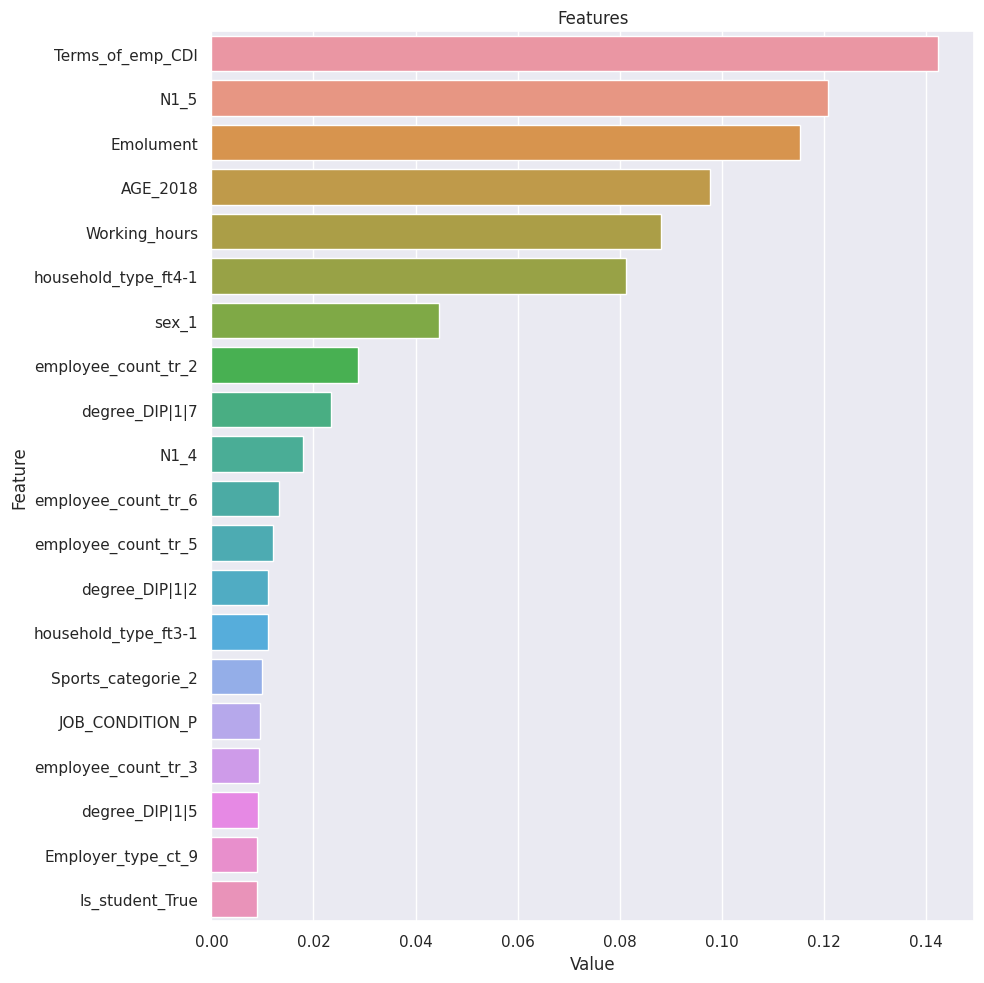

In [ ]:

model = model_6_rforest
model.fit(X, y)

plot_importance(model, X,num=20)



# Partie IV : Evaluer le systeme sur le jeu de test

Dans cette partie on va évaluer le systeme sur le jeu de test. On fera des prédiction du teget pour des personnes n'ayant pas un emploi, et une autre pour les personne ayant un statut de salariés. Les données sur le sports ne seront pas prises en compte, car elles n'ont pas rendues nos modèles meuilleurs.

### Peréparer le jeu de test

In [ ]:
df_pers_test=pd.read_csv("/content/drive/MyDrive/projet MLfiles/test_dataset.csv")
test_df_pers_insee=pd.merge(df_pers_test, df_insee, on='Insee')
test_df_pers_ins_occup=pd.merge(test_df_pers_insee, code_OCCUPATION_pcs2003, on='OCCUPATION_42')
test_df_pers_ins_occup.head()

,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,INHABITANTS,Nom de la commune,town_type,DEP,X,Y,lat,long,Groupe_N1
0,2,type1-1,32,Female,csp_5_4,False,DIP|1|6,ft4-1,01004,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373,5
1,16,type1-1,39,Female,csp_5_4,False,DIP|1|7,ft4-1,01004,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373,5
2,203,type1-1,40,Female,csp_5_4,False,DIP|1|6,ft4-1,01061,1214,Brens,Commune simple,01,909228.964,6516222.848,45.714,5.690,5
3,220,type1-2,44,Female,csp_5_4,False,DIP|1|7,ft4-2,01071,4960,Cessy,Commune simple,01,936787.754,6584147.177,46.316,6.078,5
4,273,type1-1,25,Female,csp_5_4,False,DIP|1|6,ft4-1,01098,868,Chazey-Bons,Commune simple,01,908525.316,6524984.790,45.793,5.685,5


In [ ]:
d_test=test_df_pers_insee.copy()

In [ ]:
missing_values_table(d_test)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


Pas de valeur manquante sur le jeu de test

### Données de test pour les pesonnes n'ayant pas d'emploi.

Ensemble de données sur les personnes qui n'ayant pas d'emploi.

In [ ]:
d2=pd.merge(test_df_pers_ins_occup, df_JOB_test, on='UID' , how='outer',
            indicator=True).query('_merge=="left_only"').drop(columns='_merge')
cols_vides = [col for col in d2.columns if d2[col].isnull().all()]
d2.drop(cols_vides, axis=1, inplace=True)
d2.head()

,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,INHABITANTS,Nom de la commune,town_type,DEP,X,Y,lat,long,Groupe_N1
3,220,type1-2,44,Female,csp_5_4,False,DIP|1|7,ft4-2,01071,4960,Cessy,Commune simple,01,936787.754,6584147.177,46.316,6.078,5
6,359,type1-2,47,Female,csp_5_4,False,DIP|1|5,ft2-0,01157,2231,Fareins,Commune simple,01,836303.656,6548326.526,46.021,4.762,5
9,493,type1-2,56,Female,csp_5_4,False,DIP|1|3,ft1-2,01219,168,Lompnas,Commune simple,01,895917.014,6526570.765,45.811,5.523,5
10,584,type1-1,26,Female,csp_5_4,True,DIP|1|6,ft4-1,01262,7140,Montluel,Chef-lieu canton,01,856616.969,6534361.590,45.891,5.020,5
22,1299,type1-2,43,Female,csp_5_4,False,DIP|1|6,ft4-4,02381,9690,Hirson,Chef-lieu canton,02,779372.821,6983225.136,49.943,4.105,5


In [ ]:
test_df_04=d2.copy()
drop_list = ["UID", "OCCUPATION_42", "Insee", "DEP","Nom de la commune"]

test_df_04.drop(drop_list, axis=1, inplace=True)

cat_cols, num_cols, cat_but_car = grab_col_names(test_df_04)

binary_cols = [col for col in test_df_04.columns if test_df_04[col].dtypes == "O" and len(test_df_04[col].unique()) == 2]

for col in binary_cols:
    label_encoder(test_df_04, col)

test_df_04 = one_hot_encoder(test_df_04, cat_cols, drop_first=True)


Observations: 30364
Variables: 13
cat_cols: 7
num_cols: 6
cat_but_car: 0
num_but_cat: 2


In [ ]:
target_pred_1= final_model_1.predict(test_df_04)


In [ ]:
d2['target_pred'] = target_pred_1


In [ ]:
data_1=d2[['UID','target_pred']]
data_1.head()

,UID,target_pred
3,220,45.367
6,359,41.960
9,493,41.319
10,584,43.867
22,1299,43.451


In [ ]:
data_1.to_csv('prediction_1', index=False)

### Données de personnes ayant un statut salarié

Ensemble de données dans le fichier test pour less personnes ayant un emplois.

In [ ]:
df_job_test=pd.read_csv("/content/drive/MyDrive/projet MLfiles/test_dataset_job.csv")
df_JOB_test= pd.merge(df_job_test,code_Work_description_map, on= 'Work_description')
df_pers_job_test = pd.merge(test_df_pers_ins_occup, df_JOB_test, on='UID')
df_pers_job_test=df_pers_job_test.rename(columns={ 'Groupe_N1': 'N1_Occupation42' , 'N1':'N1_Work_description'})
df_pers_job_test.head()

,UID,ACTIVITY_TYPE,AGE_2018,sex,OCCUPATION_42,Is_student,degree,household_type,Insee,INHABITANTS,Nom de la commune,town_type,DEP,X,Y,lat,long,N1_Occupation42,JOB_CATEGORY,JOB_DEP,Working_hours,eco_sect,Terms_of_emp,Employer_type,Emolument,JOB_CONDITION,employee_count,Work_description,N2,N1_Work_description
0,2,type1-1,32,Female,csp_5_4,False,DIP|1|6,ft4-1,01004,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373,5,O,01,1841.000,GZ,CDI,ct_9,29646,C,tr_2,542a,54,5
1,16,type1-1,39,Female,csp_5_4,False,DIP|1|7,ft4-1,01004,14557,Ambérieu-en-Bugey,Chef-lieu canton,01,883750.723,6542887.141,45.961,5.373,5,O,01,1455.000,KZ,CDI,ct_9,10057,P,tr_1,542a,54,5
2,203,type1-1,40,Female,csp_5_4,False,DIP|1|6,ft4-1,01061,1214,Brens,Commune simple,01,909228.964,6516222.848,45.714,5.690,5,O,39,1081.000,GZ,CDI,ct_9,25414,P,tr_1,543f,54,5
3,273,type1-1,25,Female,csp_5_4,False,DIP|1|6,ft4-1,01098,868,Chazey-Bons,Commune simple,01,908525.316,6524984.790,45.793,5.685,5,O,69,1582.000,OZ,CDI,ct_8,16333,C,tr_6,545d,54,5
4,334,type1-1,57,Female,csp_5_4,False,DIP|1|3,ft4-1,01143,9366,Divonne-les-Bains,Commune simple,01,939437.749,6590913.250,46.376,6.116,5,O,69,1819.000,GZ,CDI,ct_9,34712,C,tr_1,543f,54,5


In [ ]:
df_pers_job_test = quick_missing_imp(df_pers_job_test, num_method="median", cat_length=17)

In [ ]:
df_pers_job_test["Working_hours"] = df_pers_job_test["Working_hours"].fillna(df_pers_job_test["Working_hours"].median())


**Préparer l'ensemble pour l'algorithme de ML**

In [ ]:
test_df_05=df_pers_job_test.copy()
drop_list = ["UID", "OCCUPATION_42", "Insee", "JOB_DEP", "Work_description","N2","eco_sect", "Nom de la commune",'DEP']

test_df_05.drop(drop_list, axis=1, inplace=True)

cat_cols, num_cols, cat_but_car = grab_col_names(test_df_05)

binary_cols = [col for col in test_df_05.columns if test_df_05[col].dtypes == "O" and len(test_df_05[col].unique()) == 2]

for col in binary_cols:
    label_encoder(test_df_05, col)

test_df_05 = one_hot_encoder(test_df_05, cat_cols, drop_first=True)


Observations: 19636
Variables: 21
cat_cols: 13
num_cols: 8
cat_but_car: 0
num_but_cat: 3


In [ ]:
target_pred_2= model_4_regression.predict(test_df_05)
df_pers_job_test['target_pred'] = target_pred_2
data_2=df_pers_job_test[['UID','target_pred']]
data_2.head()

,UID,target_pred
0,2,47.656
1,16,49.966
2,203,46.051
3,273,42.790
4,334,46.543


In [ ]:
data_2.to_csv('prediction_2', index=False)